<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Condition Probability: The probability of an event occurring given that another event has already occurred.

Binomial Probability Distribution Function (PDF): A discrete distribution representing the probability of a fixed number of successes in a fixed number of Bernoulli trials.

Poisson Distribution: A discrete frequency distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space.

Expected Value: The long-run average value of repetitions of the experiment it represents.

Variance: A measure of the dispersion of a set of data points around their mean value.

Normal Distribution: A continuous probability distribution characterized by a symmetric, bell-shaped curve described by its mean and standard deviation.

Expected Value and Variance of Continuous Random Variables: The mean of the distribution representing the average outcome and the measure of the spread of the distribution, respectively, for continuous random variables.

Joint Probability Distribution: The probability distribution of two or more random variables occurring simultaneously.

Covariance: A measure of how much two random variables change together, indicating the direction of the linear relationship between variables.

Correlation: A statistical measure that expresses the extent to which two variables change together, ranging from -1 to 1.

Sample Mean and Covariance: The average of a sample and a measure of how two variables in the sample vary together.

Central Limit Theorem: States that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger, regardless of the shape of the population distribution.






In [1]:
from scipy.stats import binom
import numpy as np

# Binomial distribution parameters
n = 10  # number of trials
p = 0.5  # probability of success on each trial

# Possible number of successes
k = np.arange(0, n+1)

# PMF for each number of successes
pmf = binom.pmf(k, n, p)

# Results
k, pmf


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
        0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
        0.00097656]))

In [2]:
from scipy.stats import poisson

# Poisson distribution parameters
lambda_ = 3  # average rate (lambda)

# Possible number of occurrences
k = np.arange(0, 10+1)

# PMF for each number of occurrences
pmf = poisson.pmf(k, lambda_)

# Results
k, pmf


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
        0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ,
        0.00081015]))

In [3]:
# Random variable outcomes and their probabilities
outcomes = np.array([0, 1, 2, 3, 4, 5])
probabilities = np.array([0.1, 0.1, 0.2, 0.2, 0.3, 0.1])

# Expected value (mean)
expected_value = np.sum(outcomes * probabilities)

# Variance
variance = np.sum((outcomes - expected_value) ** 2 * probabilities)

expected_value, variance


(2.8, 2.16)

In [4]:
from scipy.stats import norm

# Normal distribution parameters
mu = 0  # mean
sigma = 1  # standard deviation

# Points at which to evaluate the PDF
x = np.linspace(-3, 3, 100)

# PDF for the normal distribution
pdf = norm.pdf(x, mu, sigma)

# Results (just showing the shape as the data is too long to display fully)
x.shape, pdf.shape


((100,), (100,))

In [5]:
# Generating two datasets
np.random.seed(0)  # For reproducibility
data1 = np.random.normal(0, 1, 1000)
data2 = data1 * 0.5 + np.random.normal(0, 1, 1000) * 0.5

# Covariance matrix
covariance_matrix = np.cov(data1, data2)

# Pearson correlation coefficient
correlation_coefficient = np.corrcoef(data1, data2)

covariance_matrix, correlation_coefficient


(array([[0.97520967, 0.47253501],
        [0.47253501, 0.4633006 ]]),
 array([[1.        , 0.70299715],
        [0.70299715, 1.        ]]))

In [6]:
# Simulating the Central Limit Theorem
sample_means = []
number_of_samples = 1000
sample_size = 30

# Drawing samples and computing their means
for _ in range(number_of_samples):
    sample = np.random.uniform(low=0, high=1, size=sample_size)
    sample_means.append(np.mean(sample))

# Computing the mean and standard deviation of the sample means
sample_means_mean = np.mean(sample_means)
sample_means_std = np.std(sample_means)

sample_means_mean, sample_means_std, np.min(sample_means), np.max(sample_means)


(0.4966662054302367,
 0.05342276781818155,
 0.28220132503613976,
 0.647182525726342)

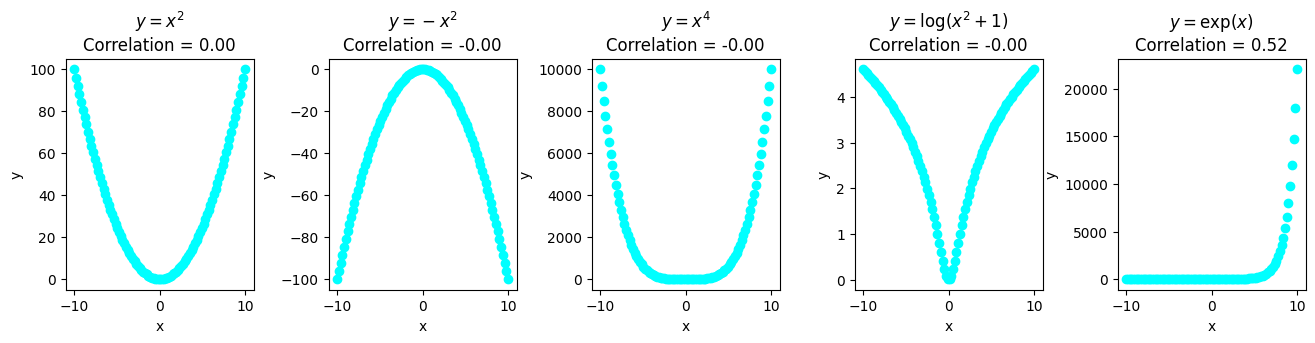

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Create a data matrix
x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,-x_nonlinear[0,]**2))
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear[0,]**4))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))
# Compute the correlation
rho_nonlinear = np.corrcoef(x_nonlinear)
# Plot the data
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2,3,4]:
  ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,],color='cyan')
  ax[i].title.set_text(title[i] + '\n' + 'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1]))
  ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)
plt.show()